In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [100]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Cleaning Data

In [102]:
#Nulls and percentage of null values
contains_null = []

for i in list(df.columns):
    if(df[i].isnull().any()):
        contains_null.append({
            'attribute': i,
            'portion': (df[i].isnull().sum() / df.shape[0])*100
        })

In [103]:
contains_null

[{'attribute': 'LotFrontage', 'portion': 17.73972602739726},
 {'attribute': 'Alley', 'portion': 93.76712328767123},
 {'attribute': 'MasVnrType', 'portion': 59.726027397260275},
 {'attribute': 'MasVnrArea', 'portion': 0.547945205479452},
 {'attribute': 'BsmtQual', 'portion': 2.5342465753424657},
 {'attribute': 'BsmtCond', 'portion': 2.5342465753424657},
 {'attribute': 'BsmtExposure', 'portion': 2.6027397260273974},
 {'attribute': 'BsmtFinType1', 'portion': 2.5342465753424657},
 {'attribute': 'BsmtFinType2', 'portion': 2.6027397260273974},
 {'attribute': 'Electrical', 'portion': 0.0684931506849315},
 {'attribute': 'FireplaceQu', 'portion': 47.26027397260274},
 {'attribute': 'GarageType', 'portion': 5.5479452054794525},
 {'attribute': 'GarageYrBlt', 'portion': 5.5479452054794525},
 {'attribute': 'GarageFinish', 'portion': 5.5479452054794525},
 {'attribute': 'GarageQual', 'portion': 5.5479452054794525},
 {'attribute': 'GarageCond', 'portion': 5.5479452054794525},
 {'attribute': 'PoolQC', '

In [104]:
#Drop the attribute having more than or equal to 80% of null values
drop_containing_null = []

thresh_drop = 45
for i in contains_null:
    if i['portion'] >= thresh_drop:
        drop_containing_null.append(i['attribute'])

drop_containing_null

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [105]:
df1 = df.drop(drop_containing_null,axis=1)

In [106]:
df1.shape

(1460, 75)

In [107]:
num_cols = df1.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df1.select_dtypes(include='object').columns.tolist()

print(num_cols,cat_cols,sep='\n')

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', '

In [108]:
#Fill other null values in the data
for i in contains_null:
    if i['attribute'] not in drop_containing_null:
        if i['attribute'] in cat_cols:
            df1[i['attribute']] = df1[i['attribute']].fillna(df1[i['attribute']].mode()[0])

        if i['attribute'] in num_cols:
            df1[i['attribute']] = df1[i['attribute']].fillna(df1[i['attribute']].mean())

for i in contains_null:
    if i['attribute'] not in drop_containing_null and df1[i['attribute']].isnull().any():
        print(i['attribute'],' has null values.')

In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Processing Data

In [110]:
df2 = pd.get_dummies(df1,drop_first=True,dtype=int)
df2.shape

(1460, 231)

In [111]:
df2.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


C:\Users\yashu\AppData\Local\Temp\ipykernel_22196\3730978800.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['SalePrice'], color= "#FF7F7F", bins=100, hist_kws={'alpha': 0.5});


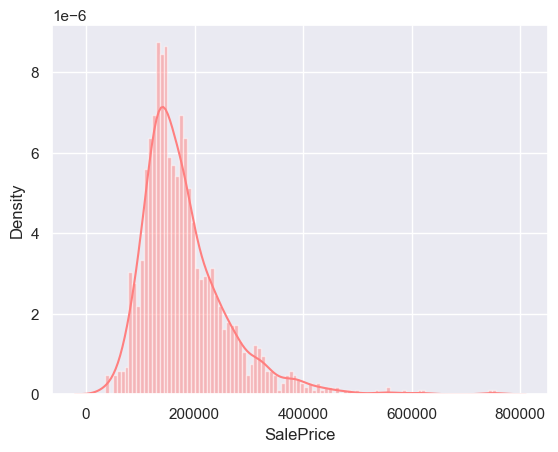

In [112]:
sns.distplot(df2['SalePrice'], color= "#FF7F7F", bins=100, hist_kws={'alpha': 0.5});

### Feature Selection

In [113]:
X = df2.drop('SalePrice',axis=1)
y = df2['SalePrice']

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=35)

In [115]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

models = {
    'RF' : RandomForestRegressor(),
    'XGB' : XGBRegressor(),
}

for i in models:
    models[i]
    rmse = np.mean(np.sqrt(-cross_val_score(models[i], X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({i})")

RMSE: 30029.9528 (RF)
RMSE: 28858.8816 (XGB)


In [116]:
model = RandomForestRegressor(verbose=False,random_state=40)

In [117]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=40, verbose=False)

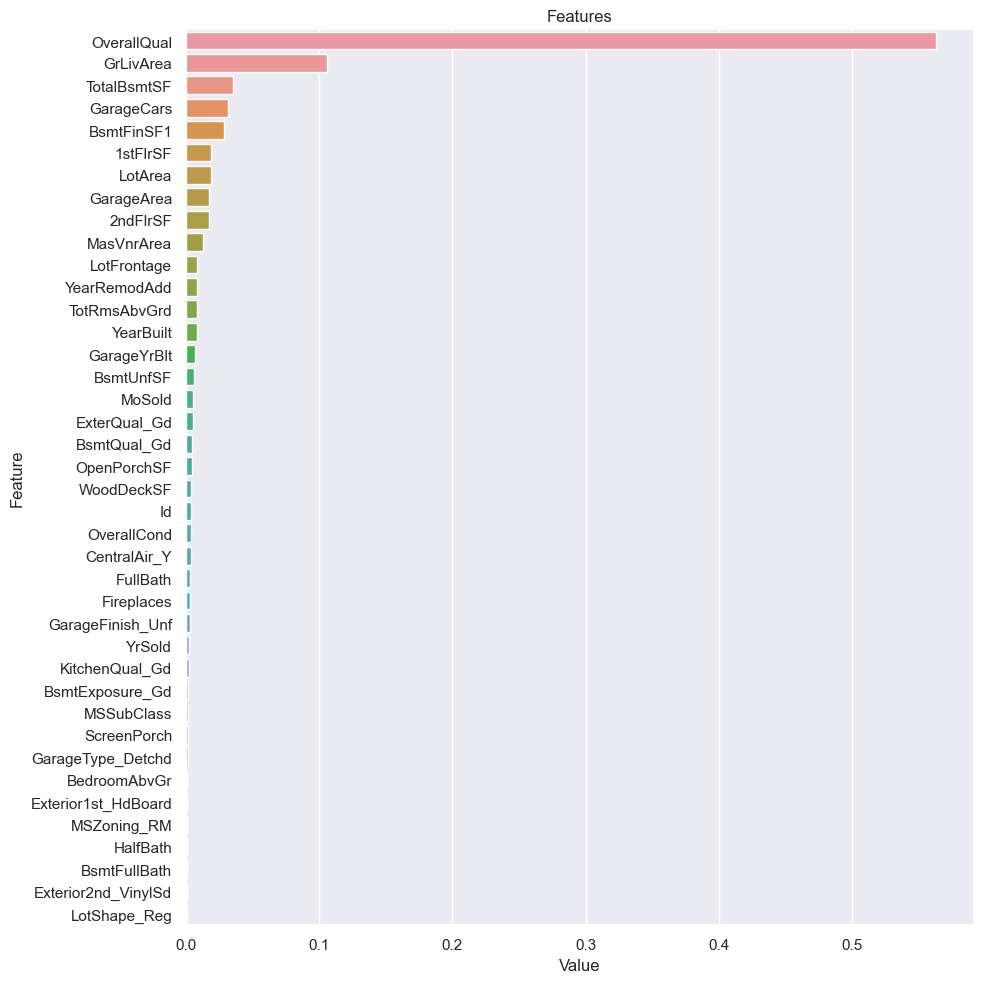

In [118]:
def plot_importance(model, features, dataframe, save=False):
    num = len(dataframe)
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set_theme(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:40])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

plot_importance(model, X_train, df2)


### Feature Engineering

In [119]:
df2["SaleAge"] = df2["YrSold"] - df2["YearBuilt"]
df2["SaleAge"].head()

0     5
1    31
2     7
3    91
4     8
Name: SaleAge, dtype: int64

In [120]:
current_year = datetime.now().year
df2["UsageAge"] = current_year - df2["YearBuilt"]
df2["UsageAge"].head()

0     21
1     48
2     23
3    109
4     24
Name: UsageAge, dtype: int64

In [121]:
df2["TotalFloors"] = df2["1stFlrSF"] + df2["2ndFlrSF"]
df2["TotalFloors"].head()

0    1710
1    1262
2    1786
3    1717
4    2198
Name: TotalFloors, dtype: int64

In [122]:
df2["TotalBsmtArea"] = df2["BsmtFinSF1"] + df2["BsmtFinSF2"] + df2["BsmtUnfSF"]
df2["TotalBsmtArea"].head()

0     856
1    1262
2     920
3     756
4    1145
Name: TotalBsmtArea, dtype: int64

In [123]:
df2["TotalBathrooms"] = df2["BsmtFullBath"] + df2["BsmtHalfBath"] + df2["FullBath"] + df2["HalfBath"]
df2["TotalBathrooms"].head()

0    4
1    3
2    4
3    2
4    4
Name: TotalBathrooms, dtype: int64

In [124]:
df2["TotalPorchArea"] = df2["WoodDeckSF"] + df2["OpenPorchSF"] + df2["EnclosedPorch"] + df2["3SsnPorch"] + df2["ScreenPorch"]
df2["TotalPorchArea"].head()

0     61
1    298
2     42
3    307
4    276
Name: TotalPorchArea, dtype: int64

In [125]:
df2["GarageAge"] = current_year - df2["GarageYrBlt"]
df2["GarageAge"].head()

0    21.0
1    48.0
2    23.0
3    26.0
4    24.0
Name: GarageAge, dtype: float64

In [126]:
df2["OpenArea"] = df2["WoodDeckSF"] + df2["OpenPorchSF"] + df2["3SsnPorch"]
df2["OpenArea"].head()

0     61
1    298
2     42
3     35
4    276
Name: OpenArea, dtype: int64

In [127]:
df2["HouseQualityScore"] = df2["OverallCond"] * df2["OverallQual"]
df2["HouseQualityScore"].head()

0    35
1    48
2    35
3    35
4    40
Name: HouseQualityScore, dtype: int64

In [128]:
df2.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleCondition_Partial,SaleAge,UsageAge,TotalFloors,TotalBsmtArea,TotalBathrooms,TotalPorchArea,GarageAge,OpenArea,HouseQualityScore
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,5,21,1710,856,4,61,21.0,61,35
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,31,48,1262,1262,3,298,48.0,298,48
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,7,23,1786,920,4,42,23.0,42,35
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,91,109,1717,756,2,307,26.0,35,35
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,8,24,2198,1145,4,276,24.0,276,40


In [129]:
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 240 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    Id                     int64  
 1    MSSubClass             int64  
 2    LotFrontage            float64
 3    LotArea                int64  
 4    OverallQual            int64  
 5    OverallCond            int64  
 6    YearBuilt              int64  
 7    YearRemodAdd           int64  
 8    MasVnrArea             float64
 9    BsmtFinSF1             int64  
 10   BsmtFinSF2             int64  
 11   BsmtUnfSF              int64  
 12   TotalBsmtSF            int64  
 13   1stFlrSF               int64  
 14   2ndFlrSF               int64  
 15   LowQualFinSF           int64  
 16   GrLivArea              int64  
 17   BsmtFullBath           int64  
 18   BsmtHalfBath           int64  
 19   FullBath               int64  
 20   HalfBath               int64  
 21   BedroomAbvGr           int64  
 22 

In [130]:
useless_cols = [col for col in df2.columns if df2[col].nunique() == 2 and
                (df2[col].value_counts() / len(df2) < 0.01).any(axis=None)]

useless_cols

['Street_Pave',
 'LotShape_IR3',
 'Utilities_NoSeWa',
 'LotConfig_FR3',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_NPkVill',
 'Neighborhood_Veenker',
 'Condition1_PosA',
 'Condition1_RRAe',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'RoofStyle_Gambrel',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CBlock',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Other',
 'Exterior2nd_Stone',
 'ExterQual_Fa',
 'ExterCond_Po',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtCond_Po',
 'BsmtFinType2_GLQ',
 'Heating_Grav',

In [131]:
df2.drop(columns=useless_cols, axis=1,inplace=True)
df2.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleCondition_Partial,SaleAge,UsageAge,TotalFloors,TotalBsmtArea,TotalBathrooms,TotalPorchArea,GarageAge,OpenArea,HouseQualityScore
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,5,21,1710,856,4,61,21.0,61,35
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,31,48,1262,1262,3,298,48.0,298,48
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,7,23,1786,920,4,42,23.0,42,35
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,91,109,1717,756,2,307,26.0,35,35
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,8,24,2198,1145,4,276,24.0,276,40


In [132]:
df2.drop('Id',axis=1,inplace=True)
df2.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_Partial,SaleAge,UsageAge,TotalFloors,TotalBsmtArea,TotalBathrooms,TotalPorchArea,GarageAge,OpenArea,HouseQualityScore
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,5,21,1710,856,4,61,21.0,61,35
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,31,48,1262,1262,3,298,48.0,298,48
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,7,23,1786,920,4,42,23.0,42,35
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,91,109,1717,756,2,307,26.0,35,35
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,8,24,2198,1145,4,276,24.0,276,40


### Model Building

In [133]:
X = df2.drop('SalePrice',axis=1)
y = df2['SalePrice']

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [135]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=40, verbose=False)

In [136]:
y_pred = model.predict(X_test)

### Model Evaluation 

In [137]:
rmse = np.mean(np.sqrt(-cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")))

print(f"RMSE: {round(rmse, 4)} (CatBoost)")

RMSE: 29664.9153 (CatBoost)
